# Demo: Activation Functions

### A simple visual showcase of what each activation function does. The two plotting functions defined below provide scaffolding for quickly and painlessly generating similarly styled figures for each activation function. In each figure the upper subplot will show the activation function on the lower subplot will show the activation function with tangent lines imposed on top. 

In [1]:
from dl_lib.activations import (
    tanh, tanh_prime, 
    relu, relu_prime,
    leaky_relu, leaky_relu_prime,
    sigmoid, sigmoid_prime
)
import numpy as np
from math import atan, sin, pi, sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
def plot_activation_function(func, func_prime, name, plot_scale, tangent_points=[]):
    """
    Plots a function in two subplots, one with and one without tangent lines.
    
    Parameters
    ----------
    func : callable
        The function being plotted.
    func_prime : callable
        Function that returns the derivative of a given point for this function.
    plot_scale : float or int
        How large to make the plot/how far to extend away from 0 on the x axis.
    tangent_points : iterable, optional
        The x coordinantes at which to draw each tangent line.
    """
    
    # Plotting our activation function
    X = np.linspace(-1 * plot_scale, plot_scale)
    y = func(X)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5 * plot_scale, 10))
    # TODO(Alec): Fix ylim setting bug.
    fig.suptitle(name, fontsize=plot_scale*10)
    axes[0].plot(X, y, color="red")
    axes[1].plot(X, y, color="red")

    # Plotting our tangent lines
    for x in tangent_points:
        # Each tangent point is the x coord of a tangent line
        x = np.asarray(x)
        y = func(x)
        m = func_prime(x)
        plot_tangent_lines(axes[1], x, y, m, line_scale=plot_scale/5)

In [3]:
def plot_tangent_lines(ax, x, y, m, line_scale=.5):
    """
    Plot a tangent line given an (x, y) point and a slope.
    """
    
    # Calculate radians of all three corners
    angle_c = pi / 2
    angle_a = atan(m)
    angle_b = angle_c - angle_a

    # Calculate lengths of all three sides
    c = line_scale
    a = c * sin(angle_a)
    b = sqrt(c**2 - a**2)

    # Calculate coordinates of points on each tangent line
    tangent_x = [x - b, x + b]
    tangent_y = [y - a, y + a]
    ax.plot(tangent_x, tangent_y, color="blue");

In [4]:
plot_scale = 5
tangent_points = [-2.5, 0.0, 2.5]

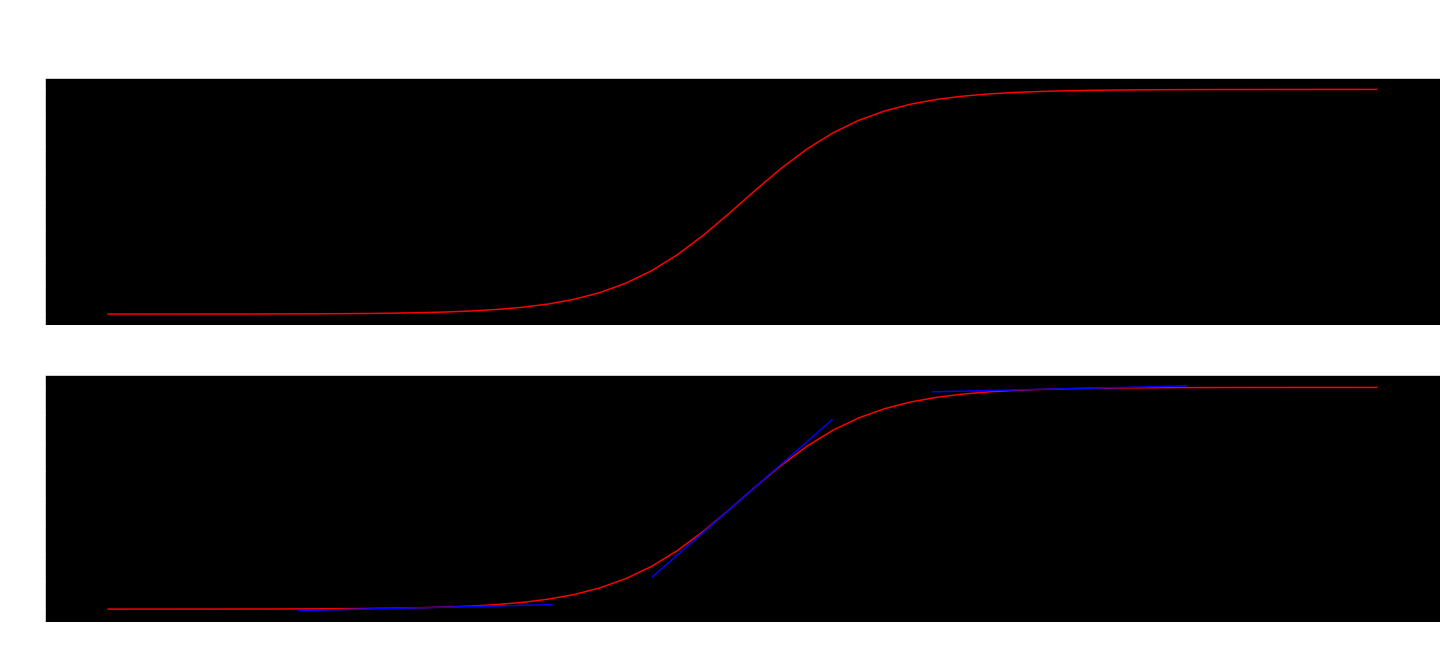

In [5]:
plot_activation_function(tanh, tanh_prime, "Hyperbolic Tangent", 
                         plot_scale=plot_scale, 
                         tangent_points=tangent_points)

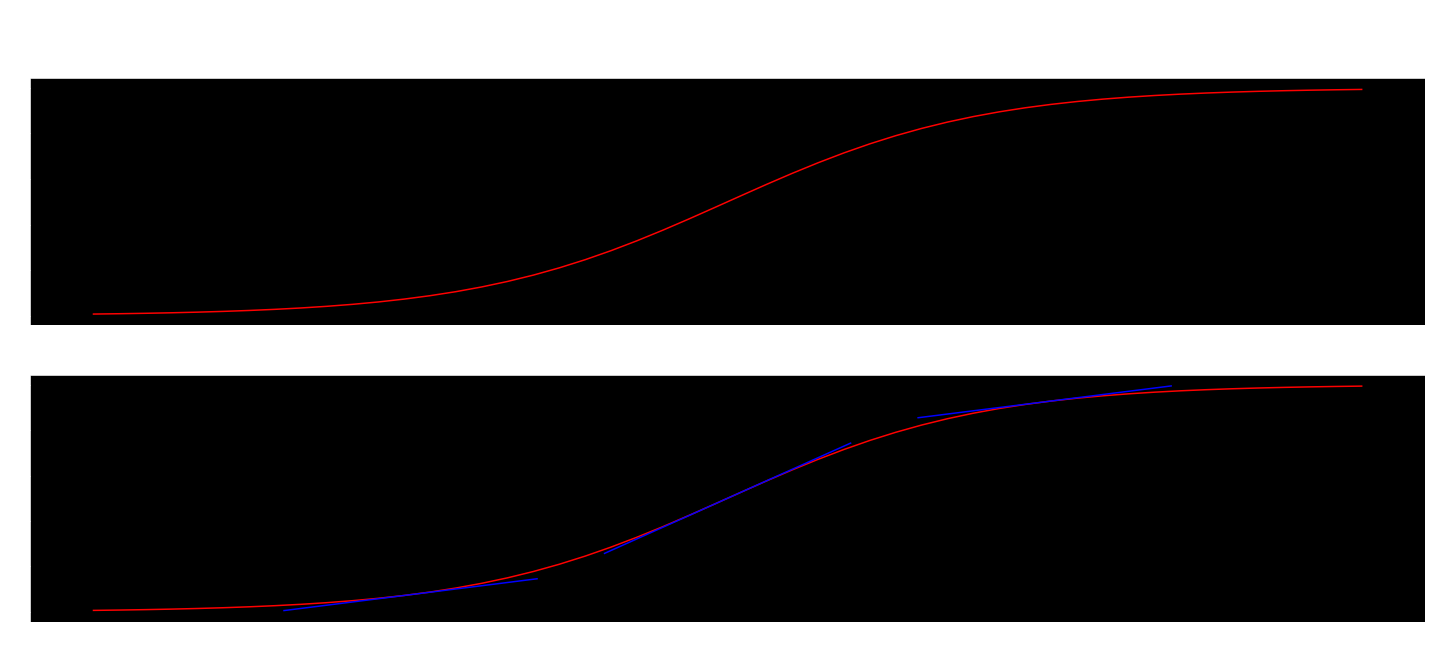

In [6]:
plot_activation_function(sigmoid, sigmoid_prime, "Sigmoid", 
                         plot_scale=plot_scale, 
                         tangent_points=tangent_points)

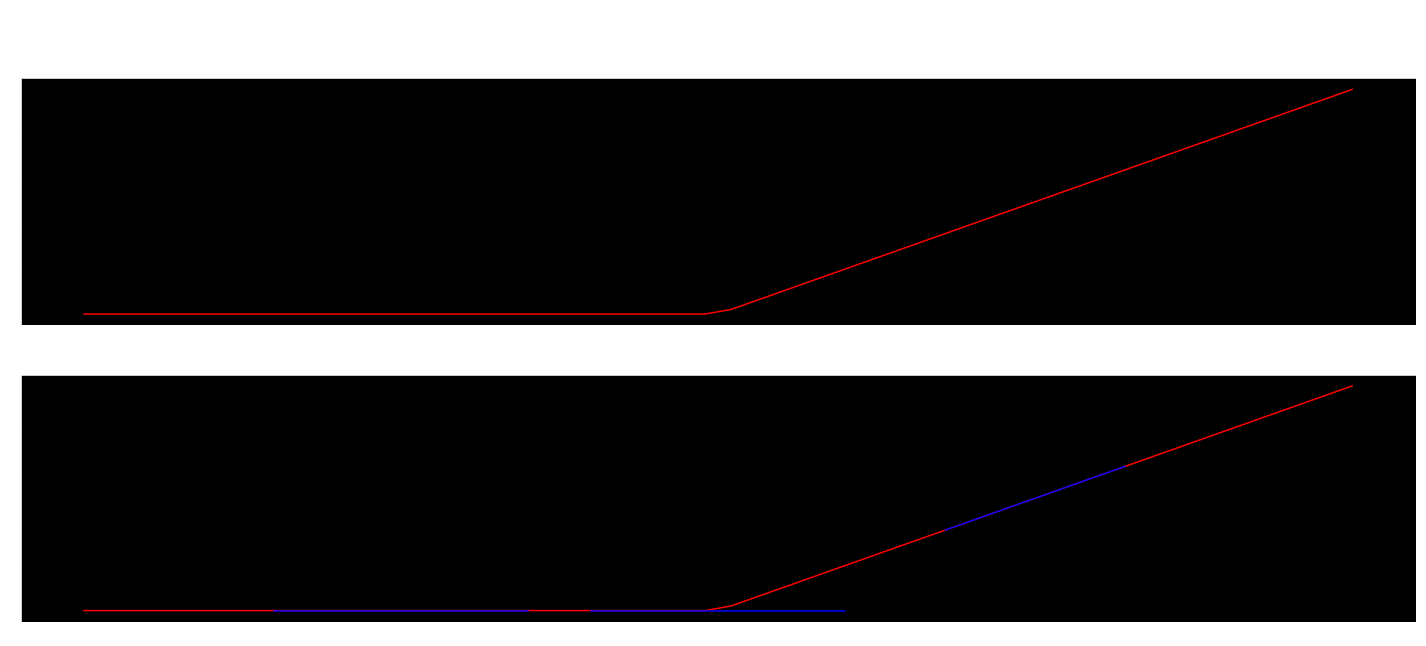

In [7]:
plot_activation_function(relu, relu_prime, "ReLU",
                         plot_scale=plot_scale, 
                         tangent_points=tangent_points)

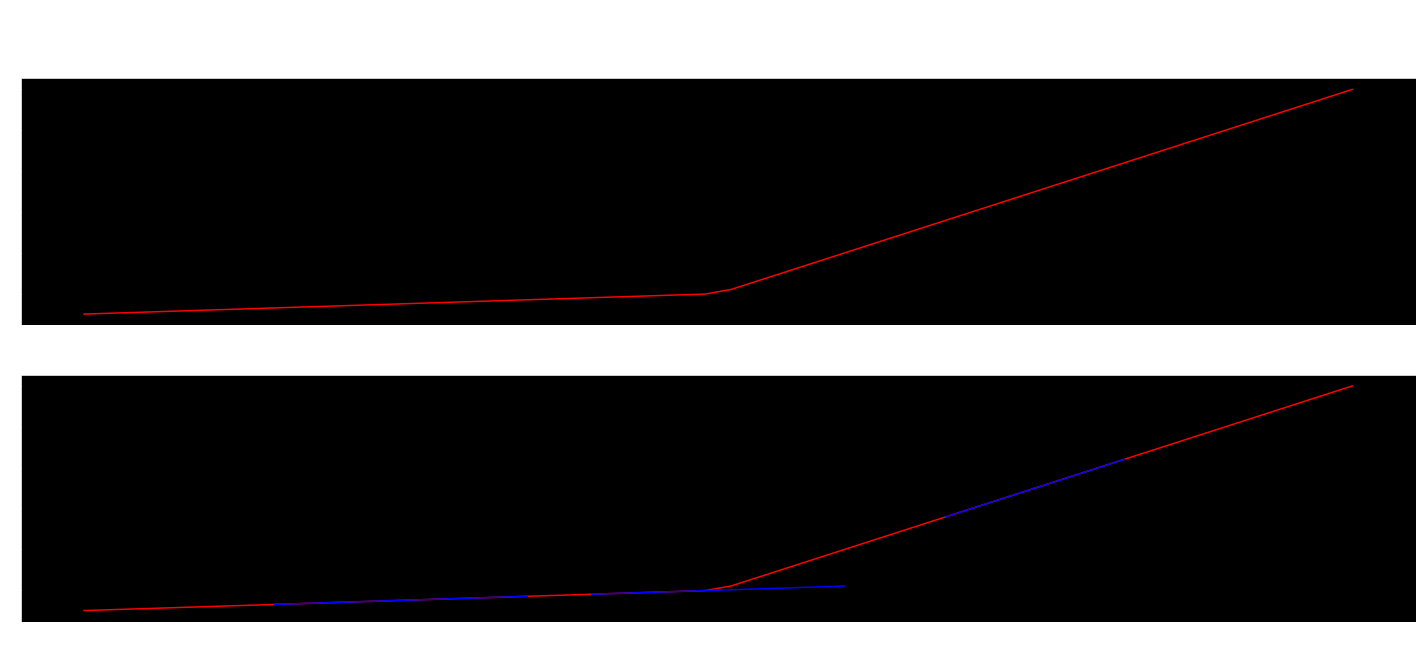

In [8]:
plot_activation_function(leaky_relu, leaky_relu_prime, "Leaky ReLU", 
                         plot_scale=plot_scale, 
                         tangent_points=tangent_points)